<a href="https://colab.research.google.com/github/MohanaR01/Melanoma_Skin_Cancer_Detection_CNN/blob/main/Mohana_Raja_Manohar_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

**Importing Skin Cancer Data**

To do: Take necessary actions to read the data





**Importing all the important libraries**


In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.



In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path('/content/gdrive/MyDrive/Skin_cancer/Train')
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Skin_cancer/Test')     

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)     

2239
118


**Load using keras.preprocessing**



Let's load these images off disk using the helpful image_dataset_from_directory utility.



**Create a dataset**


Define some parameters for the loader:



In [ ]:
batch_size = 32
img_height = 180
img_width = 180


Use 80% of the images for training, and 20% for validation.



In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,batch_size = batch_size,image_size=(img_height,img_width),seed=123,
    validation_split=0.2,subset='training')                       
    



Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,batch_size = batch_size,image_size=(img_height,img_width),seed=123,
    validation_split=0.2,subset='validation') 

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


**Visualize the data**


Todo, create a code to visualize one instance of all the nine classes present in the dataset


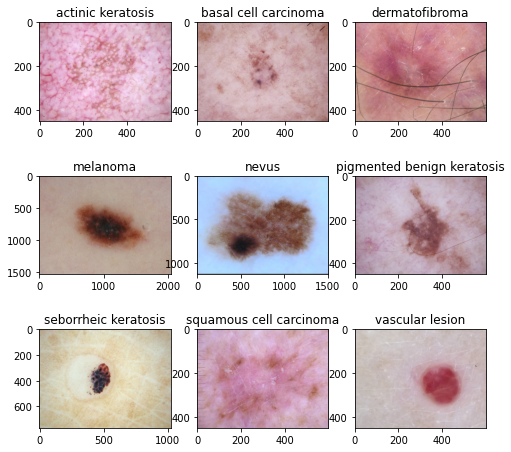

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

for i in range(9):
  plt.subplot(3,3,i+1)
  img = plt.imread(str(list(data_dir_train.glob(class_names[i] + '*/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(img)

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Create the model**

**Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]** 

In [ ]:
### Your code goes here

num_classes = 9

model = Sequential()

# Rescaling layer
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))

model.add(layers.Conv2D(16,(3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(32,(3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.1))

model.add(layers.Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(layers.Dropout(0.1))
  
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(num_classes))

Compile the model

Choose an appropirate optimiser and loss function for model training



In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()     

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 45, 45, 32)        0

Train the model


In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)     

Epoch 1/20
56/56 [==============================] - 303s 1s/step - loss: 1.9412 - accuracy: 0.3114 - val_loss: 1.9111 - val_accuracy: 0.2931
Epoch 2/20
56/56 [==============================] - 2s 30ms/step - loss: 1.6349 - accuracy: 0.4096 - val_loss: 1.5483 - val_accuracy: 0.4832
Epoch 3/20
56/56 [==============================] - 2s 29ms/step - loss: 1.5062 - accuracy: 0.4604 - val_loss: 1.4920 - val_accuracy: 0.4989
Epoch 4/20
56/56 [==============================] - 2s 29ms/step - loss: 1.4015 - accuracy: 0.5067 - val_loss: 1.4056 - val_accuracy: 0.5548
Epoch 5/20
56/56 [==============================] - 2s 29ms/step - loss: 1.2894 - accuracy: 0.5508 - val_loss: 1.4264 - val_accuracy: 0.4989
Epoch 6/20
56/56 [==============================] - 2s 30ms/step - loss: 1.2159 - accuracy: 0.5714 - val_loss: 1.3738 - val_accuracy: 0.5570
Epoch 7/20
56/56 [==============================] - 2s 30ms/step - loss: 1.1211 - accuracy: 0.6004 - val_loss: 1.4238 - val_accuracy: 0.5436
Epoch 8/20
56

**Visualizing training results**


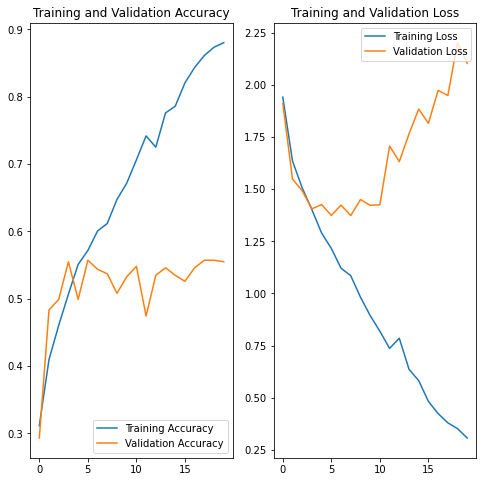

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit


Training accuracy is of 88% and validation accuracy is of 55.48% which clearly shows the evidence of overfitting.

We can do data augmentation to prevent overfitting.


In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip('horizontal',input_shape = (img_height,img_width,3)),
     layers.experimental.preprocessing.RandomRotation(0.1),
     layers.experimental.preprocessing.RandomZoom(0.1),
     layers.experimental.preprocessing.RandomTranslation(1,0.5,fill_mode='reflect',interpolation='bilinear',seed=None,fill_value=0.0),
     layers.experimental.preprocessing.RandomCrop(img_height,img_width)
    ]
)

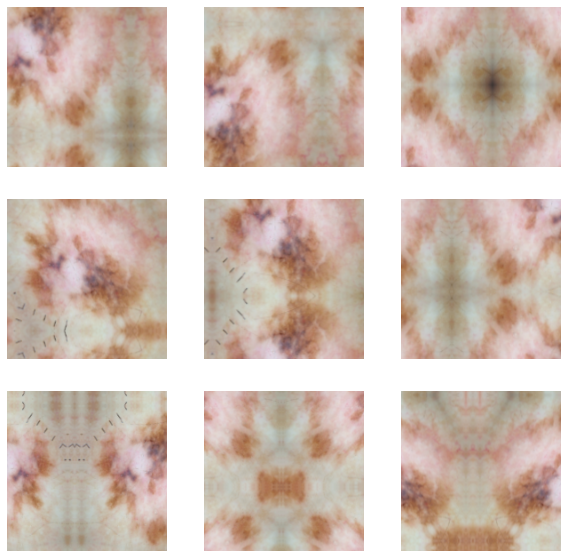

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

Todo:
Create the model, compile and train the model

In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


Compiling the model


In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training the model


In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


56/56 [==============================] - 40s 493ms/step - loss: 2.1424 - accuracy: 0.2015 - val_loss: 1.9490 - val_accuracy: 0.2461
Epoch 2/20
56/56 [==============================] - 27s 483ms/step - loss: 1.8670 - accuracy: 0.2985 - val_loss: 1.7228 - val_accuracy: 0.3535
Epoch 3/20
56/56 [==============================] - 27s 487ms/step - loss: 1.6954 - accuracy: 0.3677 - val_loss: 1.6148 - val_accuracy: 0.4049
Epoch 4/20
56/56 [==============================] - 27s 488ms/step - loss: 1.6454 - accuracy: 0.3689 - val_loss: 1.6495 - val_accuracy: 0.3736
Epoch 5/20
56/56 [==============================] - 27s 483ms/step - loss: 1.6370 - accuracy: 0.3700 - val_loss: 1.8966 - val_accuracy: 0.3490
Epoch 6/20
56/56 [==============================] - 27s 482ms/step - loss: 1.6384 - accuracy: 0.3901 - val_loss: 1.6368 - val_accuracy: 0.4228
Epoch 7/20
56/56 [==============================] - 27s 480ms/step - loss: 1.5066 - accuracy: 0.4381 - val_loss: 1.5590 - val_accuracy: 0.4340
Epoch 8/20

Visualizing the results


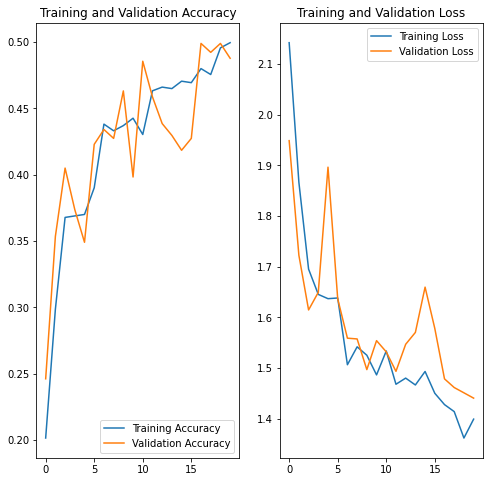

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

The model is not overfit but it is underfit. Also there is significant decrease in accuracy.

Todo: Find the distribution of classes in the training dataset.

Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<Figure size 720x720 with 0 Axes>

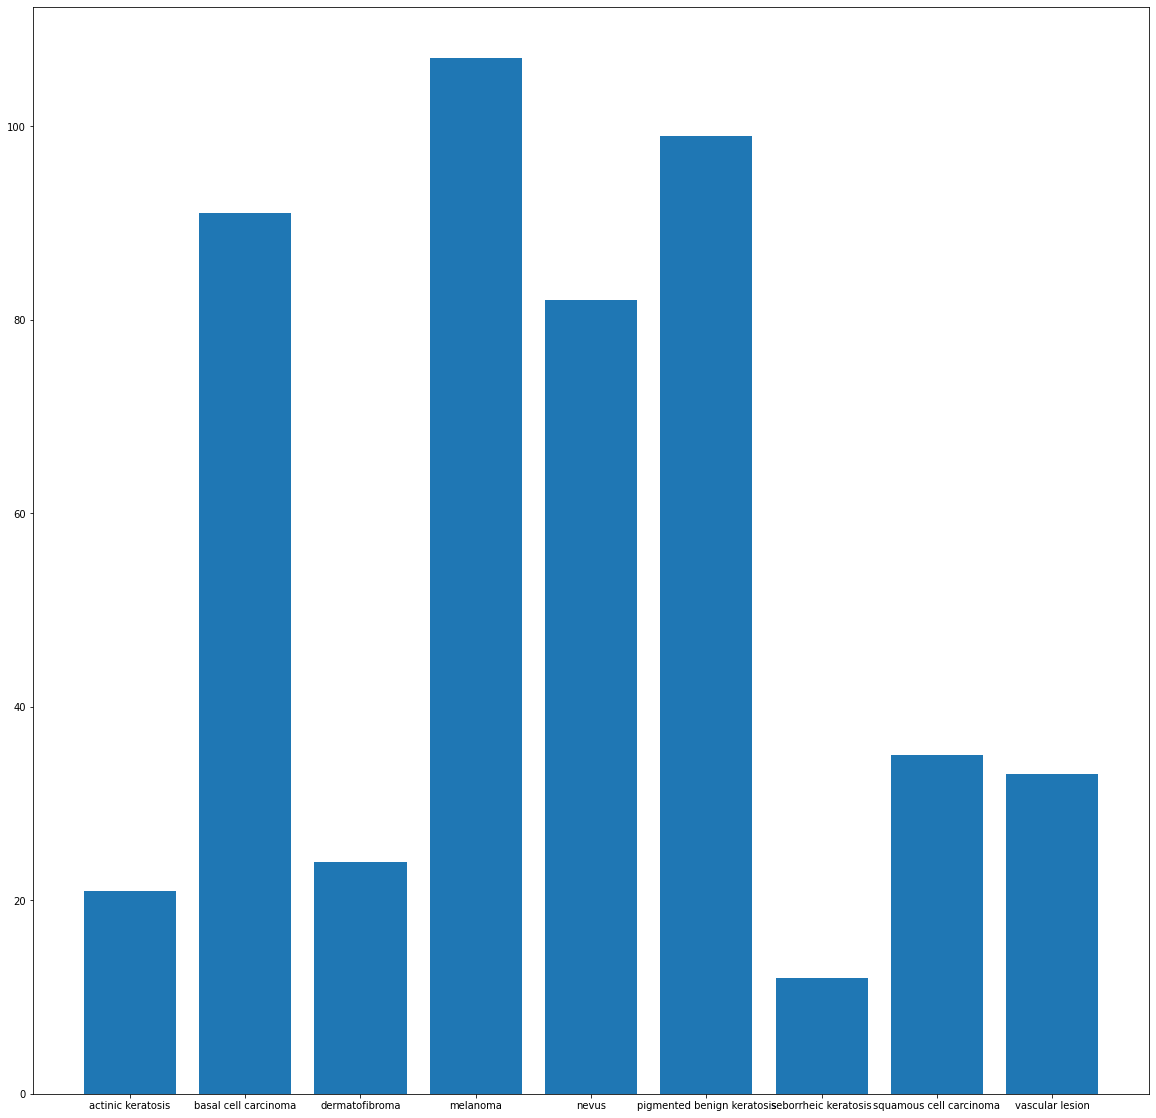

In [ ]:
## Your code goes here.

data = dict()

for i in class_names:
  data[i] = []

plt.figure(figsize = (10,10))
for image,label in train_ds:
  for i in range(9):
    data[class_names[label[i]]].append(image[i].numpy().astype('uint8'))

for i in data:
  data[i] = len(data[i])

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)

plt.bar(range(len(data)),list(data.values()),align='center')
plt.xticks(range(len(data)),list(data.keys()))
plt.show()

Todo: Write your findings here:
- Which class has the least number of samples?

Seborrheic keratosis has the least number of samples.

- Which classes dominate the data in terms proportionate number of samples?

Melanoma dominates the data in terms of proportionate number of samples.

Todo: Rectify the class imbalance

Context: You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use Augmentor, the following general procedure is followed:

Instantiate a Pipeline object pointing to a directory containing your initial image data set.

Define a number of operations to perform on this data set using your Pipeline object.

Execute these operations by calling the Pipeline’s sample() method.

In [ ]:
path_to_training_dataset="/content/gdrive/MyDrive/Skin_cancer/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)  #Adding 500 samples per class to make sure that none of the classes are sparse

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_cancer/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F28E2DA4F10>: 100%|██████████| 500/500 [00:27<00:00, 18.20 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_cancer/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F28E2D62E80>: 100%|██████████| 500/500 [00:26<00:00, 19.19 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_cancer/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F28E2E1C0A0>: 100%|██████████| 500/500 [00:23<00:00, 20.85 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_cancer/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F28E2D5D2B0>: 100%|██████████| 500/500 [01:47<00:00,  4.65 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_cancer/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F28E1E669D0>: 100%|██████████| 500/500 [01:31<00:00,  5.47 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_cancer/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F29601187F0>: 100%|██████████| 500/500 [00:20<00:00, 24.11 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_cancer/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F28DE83AA30>: 100%|██████████| 500/500 [00:49<00:00, 10.17 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_cancer/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F297CED7F70>: 100%|██████████| 500/500 [00:21<00:00, 23.18 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_cancer/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F297CEC9BB0>: 100%|██████████| 500/500 [00:23<00:00, 21.14 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.



In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [ ]:
print(data_dir_train)

/content/gdrive/MyDrive/Skin_cancer/Train


Lets see the distribution of augmented data after adding new images to the original training data.


In [ ]:
import glob
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new 

['/content/gdrive/MyDrive/Skin_cancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026848.jpg_673bca3d-5acb-4691-8513-b2171a54b6a9.jpg',
 '/content/gdrive/MyDrive/Skin_cancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027615.jpg_3a271d65-0b37-4746-a611-fa06bb705660.jpg',
 '/content/gdrive/MyDrive/Skin_cancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026625.jpg_da52a403-86c6-4f2e-9741-cea328ae30b5.jpg',
 '/content/gdrive/MyDrive/Skin_cancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026575.jpg_9edbda3e-fa7d-454b-9b72-1aa06374eead.jpg',
 '/content/gdrive/MyDrive/Skin_cancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031292.jpg_5ee99b89-9edb-4425-a658-182d193ba0e4.jpg',
 '/content/gdrive/MyDrive/Skin_cancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026650.jpg_2ff4e4c3-7e93-40ef-a71f-1521a3f8d976.jpg',
 '/content/gdrive/MyDrive/Skin_cancer/Train/actinic keratosis/ou

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
df2

,Path,Label
0,/content/gdrive/MyDrive/Skin_cancer/Train/acti...,actinic keratosis
1,/content/gdrive/MyDrive/Skin_cancer/Train/acti...,actinic keratosis
2,/content/gdrive/MyDrive/Skin_cancer/Train/acti...,actinic keratosis
3,/content/gdrive/MyDrive/Skin_cancer/Train/acti...,actinic keratosis
4,/content/gdrive/MyDrive/Skin_cancer/Train/acti...,actinic keratosis
...,...,...
4495,/content/gdrive/MyDrive/Skin_cancer/Train/nevu...,nevus
4496,/content/gdrive/MyDrive/Skin_cancer/Train/nevu...,nevus
4497,/content/gdrive/MyDrive/Skin_cancer/Train/nevu...,nevus
4498,/content/gdrive/MyDrive/Skin_cancer/Train/nevu...,nevus


In [ ]:
df2['Label'].value_counts()


actinic keratosis             500
squamous cell carcinoma       500
vascular lesion               500
dermatofibroma                500
seborrheic keratosis          500
basal cell carcinoma          500
pigmented benign keratosis    500
melanoma                      500
nevus                         500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.



Todo: Train the model on the data created using Augmentor


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Todo: Create a training dataset


In [ ]:
data_dir_train="/content/gdrive/MyDrive/Skin_cancer/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', # Todo choose the correct parameter value, so that only training data is refered to
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


Todo: Create a validation dataset


In [ ]:

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',# Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


Todo: Create your model (make sure to include normalization)


In [ ]:
## your code goes here
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Todo: Compile your model (Choose optimizer and loss function appropriately)


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Todo: Train your model


In [ ]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 41s 74ms/step - loss: 2.1109 - accuracy: 0.2112 - val_loss: 1.6479 - val_accuracy: 0.3563
Epoch 2/50
169/169 [==============================] - 5s 29ms/step - loss: 1.5080 - accuracy: 0.4258 - val_loss: 1.3176 - val_accuracy: 0.5130
Epoch 3/50
169/169 [==============================] - 5s 29ms/step - loss: 1.2787 - accuracy: 0.5197 - val_loss: 1.1659 - val_accuracy: 0.5895
Epoch 4/50
169/169 [==============================] - 5s 27ms/step - loss: 1.1102 - accuracy: 0.5925 - val_loss: 1.1083 - val_accuracy: 0.5954
Epoch 5/50
169/169 [==============================] - 5s 29ms/step - loss: 0.9292 - accuracy: 0.6528 - val_loss: 1.0751 - val_accuracy: 0.6110
Epoch 6/50
169/169 [==============================] - 5s 29ms/step - loss: 0.7688 - accuracy: 0.7196 - val_loss: 0.8747 - val_accuracy: 0.6978
Epoch 7/50
169/169 [==============================] - 5s 27ms/step - loss: 0.6472 - accuracy: 0.7667 - val_loss: 0.8853 - val_accuracy: 0.722

Todo: Visualize the model results


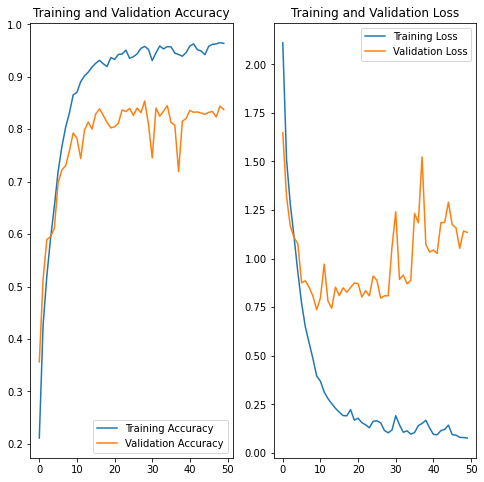

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Todo: Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

After class rebalancing, there is significant increase in accuracy of both train and validation set and reduction in loss of both train and validation set.